__Continuing or Task 4.10__


__First importing the Dataset__

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating path
path = r'/Users/rayruslijunior/11-2021 Instacart Basket Analysis'

In [3]:
#importing our latest data-set , unfortunately we are not yet finished ...ughhh
df_merged = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_custs_merged_2.pkl'))

In [5]:
#checking if our data has been imported succesfully
df_merged.shape

(32641268, 40)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df_merged.head(2)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_range,parental_status,day,part_of_day,department_name,department_performance,price_range_loc
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy days,Average orders,11,Regularly busy,6.367188,Low Spender,20,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,non low activity customer,31-40,040000 - 080000,parent,Monday,Morning,beverages,High performing dept,Mid-range product
1,2539329,1,1,2,8,NaN,True,14084.0,2.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy days,Average orders,11,Regularly busy,6.367188,Low Spender,20,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,non low activity customer,31-40,040000 - 080000,parent,Monday,Morning,dairy eggs,High performing dept,Mid-range product


In [8]:
#i need to reduce the size of the dataframe since it seem it is a bit too funky for my macbook air

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641268 entries, 0 to 32641267
Data columns (total 40 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_day_of_week       uint16  
 4   order_hour_of_day       uint16  
 5   days_since_prior_order  float16 
 6   first_order             bool    
 7   product_id              float64 
 8   add_to_cart_order       float16 
 9   product_name            category
 10  aisle_id                float16 
 11  department_id           float16 
 12  prices                  float32 
 13  busiest_day             category
 14  busiest_days            category
 15  busiest_period_of_day   category
 16  max_order               int16   
 17  loyalty_flag            category
 18  spending                float16 
 19  spending_flag           category
 20  frequency               int16   
 21  freque

In [9]:
#changing the data types from our added collumn to category
df_merged[['gender','state','fam_status','region','exclusion_flag','age_group','income_range','parental_status','day','part_of_day','department_name','department_performance']]=df_merged[['gender','state','fam_status','region','exclusion_flag','age_group','income_range','parental_status','day','part_of_day','department_name','department_performance']].astype('category') 

In [10]:
df_merged.drop('_merge',axis =1, inplace = True)

In [11]:
df_merged[['age','n_dependants','income']] = df_merged[['age','n_dependants','income']].astype('int16')

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641268 entries, 0 to 32641267
Data columns (total 39 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_day_of_week       uint16  
 4   order_hour_of_day       uint16  
 5   days_since_prior_order  float16 
 6   first_order             bool    
 7   product_id              float64 
 8   add_to_cart_order       float16 
 9   product_name            category
 10  aisle_id                float16 
 11  department_id           float16 
 12  prices                  float32 
 13  busiest_day             category
 14  busiest_days            category
 15  busiest_period_of_day   category
 16  max_order               int16   
 17  loyalty_flag            category
 18  spending                float16 
 19  spending_flag           category
 20  frequency               int16   
 21  freque

__6.Create an appropriate visualization to show the distribution of profiles.__

__6.1 Visualization__

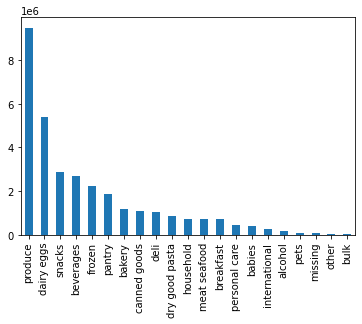

In [11]:
#creating bar chart for each department
bar_department = df_merged['department_name'].value_counts().plot.bar()


In [31]:
#exporting top selling department bar
bar_department.figure.savefig(os.path.join(path,'04 Analysis','visualizations','top_departments.png'))

In [33]:
#creating subset only on our high performance department
df_perf = df_merged[df_merged['department_performance']=='High performing dept']

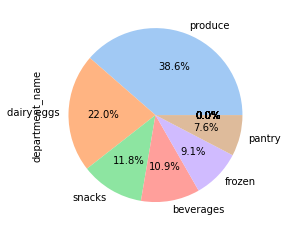

In [53]:
top_6_department = df_perf['department_name'].value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel',6)
)



#this chart could be send to our marketing department to show our top 6 departments

In [54]:
#exporting top selling department bar
top_6_department.figure.savefig(os.path.join(path,'04 Analysis','visualizations','top_6_departments.png'))

In [13]:
crosstab_random_price = pd.crosstab(df_merged['order_hour_of_day'], df_merged['day'], dropna = False)
print(crosstab_random_price)
crosstab_random_price.to_clipboard()

day                Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
order_hour_of_day                                                        
0                   31519   30067     39121   37314     29721    27710   
1                   18339   14798     22687   18391     15095    13651   
2                   11468    8390     12835   10859      9581     8730   
3                    7960    7066      8926    7151      8370     5826   
4                    7990    6846      8435    7721      8791     6893   
5                   10856   12818     11724   14506     14839    11830   
6                   32372   44051     35178   53047     46582    41200   
7                  118231  123176    134276  166224    129718   111362   
8                  240804  225199    308390  334892    225548   199671   
9                  318761  331043    444111  508524    317005   279830   
10                 365393  361963    519619  552924    357659   315499   
11                 377223  354649    5

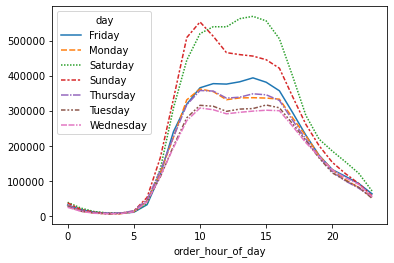

In [16]:
crosstab_random_price_line = sns.lineplot(data = crosstab_random_price)

In [18]:
crosstab_department_product = pd.crosstab(df_merged['department_name'], df_merged['product_id'], dropna = False)
print(crosstab_department_product)
crosstab_department_product.to_clipboard()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#upgrading our plot bar order hour of day
bar_hour = df_merged['order_hour_of_day'].value_counts().plot.bar(color = sns.color_palette('pastel')),plt.title('busiest hour of the day')

In [ ]:
#upgrading our plot bar order hour of day
bar_hour = df_merged['order_hour_of_day'].plot.bar(color = sns.color_palette('pastel')),plt.title('busiest hour of the day')

In [ ]:
#upgrading our plot bar order hour of day
bar_hour = df_merged['order_hour_of_day'].value_counts().plot.bar(color = sns.color_palette('pastel')),plt.title('busiest hour of the day')

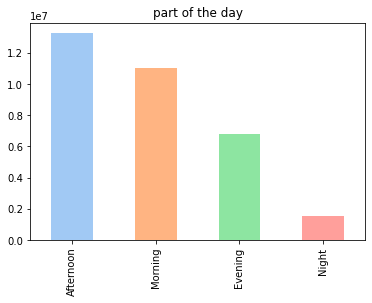

In [64]:
#barchart with our part_of_day
bar_part_of_day = df_merged['part_of_day'].value_counts().plot.bar(color = sns.color_palette('pastel')),plt.title('part of the day order
                                                                                                                  ')

In [74]:
#crosstab for department performance 
crosstab_department_day = pd.crosstab(df_merged['part_of_day'], df_merged['department_performance'], dropna = False)
print(crosstab_department_day)
crosstab_order_price.to_clipboard()

department_performance  High performing dept  Normal performing dept
part_of_day                                                         
Afternoon                            9952959                 3310029
Evening                              5107663                 1699081
Morning                              8325457                 2690216
Night                                1177744                  378119


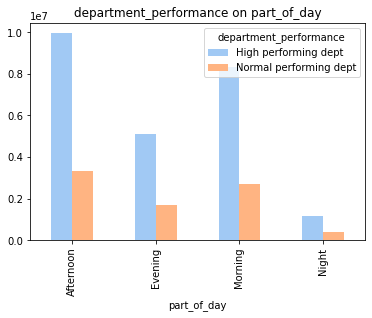

In [75]:
crosstab_department_day.plot = crosstab_department_day.plot.bar(color = sns.color_palette('pastel')),plt.title('department_performance on part_of_day')

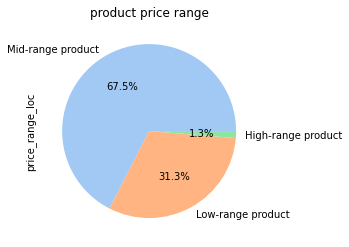

In [44]:
#displaying our price range column
price_range_pie =df_merged['price_range_loc'].value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel')),plt.title('product price range')

In [23]:
crosstab_order_price = pd.crosstab(df_merged['order_hour_of_day'], df_merged['price_range_loc'], dropna = False)
print(crosstab_order_price)
crosstab_order_price.to_clipboard()

price_range_loc    High-range product  Low-range product  Mid-range product
order_hour_of_day                                                          
0                                2752              68160             147830
1                                1399              35953              78331
2                                 910              21785              46665
3                                 634              15795              34839
4                                 686              16507              36039
5                                1050              27214              59680
6                                3697              89902             196851
7                               11464             275920             603539
8                               21692             536748            1159423
9                               29335             775279            1649228
10                              33374             873664            1854295
11          

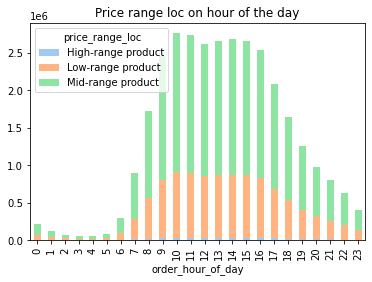

In [24]:
crosstab_order_price.plot = crosstab_order_price.plot.bar(stacked = True, color = sns.color_palette('pastel')),plt.title('Price range loc on hour of the day')


In [46]:
crosstab_region_price = pd.crosstab(df_merged['region'], df_merged['price_range_loc'], dropna = False)
print(crosstab_region_price)
crosstab_order_price.to_clipboard()

price_range_loc  High-range product  Low-range product  Mid-range product
region                                                                   
Midwest                       96658            2372304            5127103
Northeast                     56010            1384019            2978811
South                        129616            3168272            6855302
West                         130267            3201726            6899644


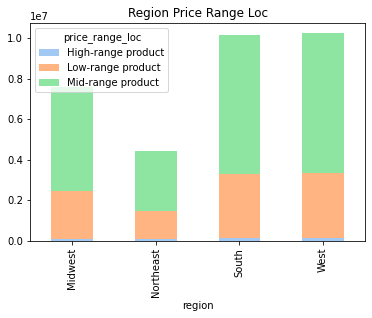

In [47]:
crosstab_region_price = crosstab_region_price.plot.bar(stacked = True, color = sns.color_palette('pastel')),plt.title('Region Price Range Loc')

__6.2 Exploring our customers__

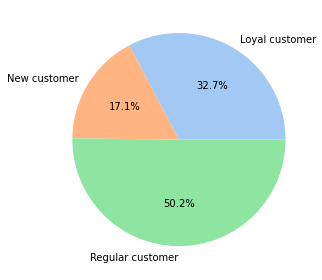

In [13]:
#answering distribution of customer according to brand loyalty
loyalty_pie = df_merged['frequency_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('pastel',3))
plt.ylabel('')
plt.tight_layout()

In [14]:
#exporting our loyalty pie
loyalty_pie.figure.savefig(os.path.join(path,'04 Analysis','visualizations','loyalty_pie.png'))

In [81]:
#checking our customer distribution in each region based on frequency flag
crosstab_region_customer = pd.crosstab(df_merged['region'],df_merged['frequency_flag'],dropna = False)
print (crosstab_region_customer)
crosstab_region_customer.to_clipboard()

frequency_flag  Loyal customer  New customer  Regular customer
region                                                        
Midwest                2461962       1310882           3879691
Northeast              1455710        767995           2228359
South                  3335405       1746980           5146813
West                   3426501       1754361           5126609


(Text(27.0, 0.5, 'millions'), None)

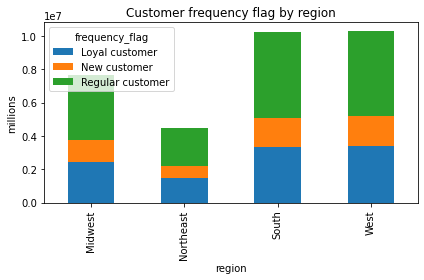

In [82]:
#creating visualization about crosstab_region_customer
bar_region = crosstab_region_customer.plot(kind='bar', stacked= True),
plt.title('Customer frequency flag by region')
plt.ylabel('millions'),plt.tight_layout()

In [61]:
#creating visualization age_group and frequency_flag
crosstab_age_frequency = pd.crosstab(df_merged['age_group'],df_merged['frequency_flag'],dropna = False)
print (crosstab_age_frequency)
crosstab_age_frequency.to_clipboard()

frequency_flag  Loyal customer  New customer  Regular customer
age_group                                                     
18-20                   486031        262485            785663
21-30                  1651506        880479           2581496
31-40                  1678233        855879           2573055
41-50                  1690812        872472           2565914
51-60                  1667348        877905           2551918
61-70                  1666308        873099           2501999
71-80                  1672622        867677           2565299
80+                     166718         90222            256128


(Text(0.5, 1.0, 'Customer frequency flag by age group'), None)

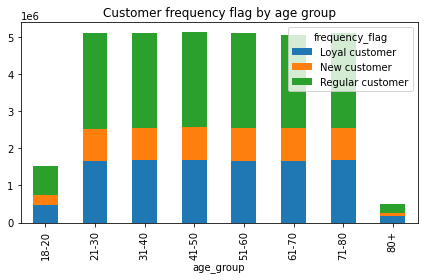

In [63]:
age_frequency = crosstab_age_frequency.plot(kind='bar', stacked= True),
plt.title('Customer frequency flag by age group'),plt.tight_layout()

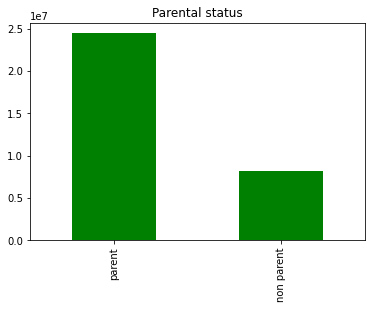

In [58]:
#parental status 
bar_parents= df_merged['parental_status'].value_counts().plot.bar(color = 'green'),plt.title('Parental status')

In [76]:
#checking parent and price range loc
crosstab_parent_price = pd.crosstab(df_merged['parental_status'], df_merged['price_range_loc'], dropna = False)
print(crosstab_parent_price)
crosstab_parent_price.to_clipboard()

price_range_loc  High-range product  Low-range product  Mid-range product
parental_status                                                          
non parent                   100949            2531324            5464002
parent                       311602            7594997           16396858


In [17]:
#checking our customer distribution in each region based on frequency flag
crosstab_region_order = pd.crosstab(df_merged['region'],df_merged['order_hour_of_day'],dropna = False)
print (crosstab_region_order)
crosstab_region_order.to_clipboard()

order_hour_of_day     0      1      2      3      4      5      6       7   \
region                                                                       
Midwest            51112  27582  17098  11998  12784  20040  67783  209717   
Northeast          30084  16753   9827   7338   7654  12129  37154  119526   
South              69456  36227  20662  16508  16926  29375  93763  283411   
West               69685  36027  22317  15831  16272  27117  93833  284509   

order_hour_of_day      8       9       10      11      12      13      14  \
region                                                                      
Midwest            400918  576767  651155  646315  616721  623236  629723   
Northeast          234103  333022  377520  375968  362975  367318  369917   
South              549193  780609  873855  863418  824602  833180  845588   
West               545657  780669  878479  869668  833235  856437  863856   

order_hour_of_day      15      16      17      18      19      20   

In [85]:
#Crosstab family status by region
crosstab_status_region = pd.crosstab(df_merged['region'], df_merged['fam_status'], dropna = False)
print(crosstab_status_region)
crosstab_status_region.to_clipboard()

fam_status  divorced/widowed  living with parents and siblings  married  \
region                                                                    
Midwest               651031                            369105  5364374   
Northeast             386009                            217635  3140479   
South                 864484                            507549  7173173   
West                  890576                            467627  7244379   

fam_status   single  
region               
Midwest     1268025  
Northeast    707941  
South       1683992  
West        1704889  


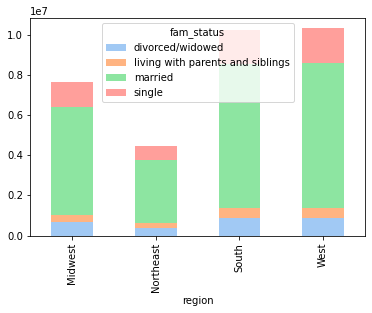

In [86]:
#visualization of family status by region
crosstab_status_region_graph = crosstab_status_region.plot(kind='bar', color = sns.color_palette('pastel'),stacked = True )

In [90]:
crosstab_status_ordertime = pd.crosstab(df_merged['part_of_day'], df_merged['fam_status'], dropna = False)
print(crosstab_status_ordertime)
crosstab_status_ordertime.to_clipboard()

fam_status   divorced/widowed  living with parents and siblings  married  \
part_of_day                                                                
Afternoon             1136018                            635263  9314592   
Evening                584956                            325325  4781600   
Morning                939614                            524727  7739130   
Night                  131512                             76601  1087083   

fam_status    single  
part_of_day           
Afternoon    2177115  
Evening      1114863  
Morning      1812202  
Night         260667  


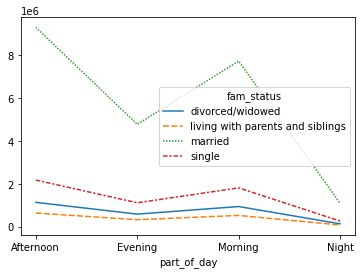

In [91]:
crosstab_status_ordertime_line = sns.lineplot(data = crosstab_status_ordertime)

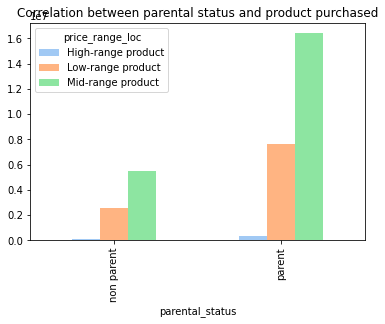

In [79]:
#visualization for parental status and price_range
crosstab_parent_price_graph = crosstab_parent_price.plot(kind='bar', color =sns.color_palette('pastel')),pltb.title('Correlation between parental status and product purchased')

In [60]:
#checking correlation by creating crosstab for age_group and income_range
crosstab_age_income = pd.crosstab(df_merged['age_group'], df_merged['income_range'], dropna = False)
print(crosstab_age_income)
crosstab_age_income.to_clipboard()

income_range  025000 - 040000  040000 - 080000  080000 - 120000  \
age_group                                                         
18-20                  108829           949874           458770   
21-30                  374754          3125610          1554217   
31-40                  361185          3146594          1535316   
41-50                  211695           662440          1902950   
51-60                  228302           672214          1888762   
61-70                  225068           638537          1885191   
71-80                  212170           660399          1922703   
80+                     24206            66963           188684   

income_range  120000 - 160000  160000 - 210000  210000 - 523000  over 523000  
age_group                                                                     
18-20                    6473             7419             2814            0  
21-30                   20068            21787            17045            0  
31-40        

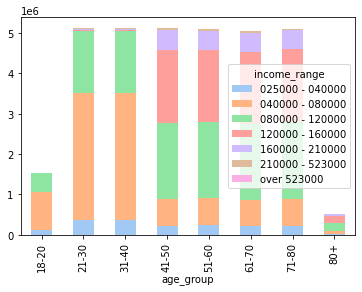

In [62]:
#creating visualizations for our crosstab_age_income
crosstab_age_income_graph = crosstab_age_income.plot(kind='bar', color =C,stacked = True )

In [32]:
#saving our good old visualization for age_income correlation
crosstab_age_income_graph.figure.savefig(os.path.join(path,'04 Analysis','visualizations','age_income.png'))

In [93]:
#checking correlation by creating crosstab for age_group and loyalty_flag
crosstab_age_loyalty = pd.crosstab(df_merged['age_group'], df_merged['frequency_flag'], dropna = False)
print(crosstab_age_loyalty)
crosstab_age_loyalty.to_clipboard()

frequency_flag  Loyal customer  New customer  Regular customer
age_group                                                     
18-20                   486031        262485            785663
21-30                  1651506        880479           2581496
31-40                  1678233        855879           2573055
41-50                  1690812        872472           2565914
51-60                  1667348        877905           2551918
61-70                  1666308        873099           2501999
71-80                  1672622        867677           2565299
80+                     166718         90222            256128


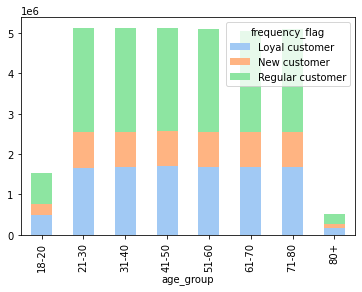

In [94]:
#visualization of family status by region
crosstab_age_loyalty_graph = crosstab_age_loyalty.plot(kind='bar', color = sns.color_palette('pastel'),stacked = True )

__7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.__

In [21]:
df_merged.groupby('frequency_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
frequency_flag                                    
Loyal customer                 6.113281  0.0  30.0
New customer                  18.250000  0.0  30.0
Regular customer              12.453125  0.0  30.0

In [55]:
df_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
age_group                     
18-20      7.795291  1.0  25.0
21-30      7.778352  1.0  25.0
31-40      7.791846  1.0  25.0
41-50      7.800425  1.0  25.0
51-60      7.781060  1.0  25.0
61-70      7.799260  1.0  25.0
71-80      7.791802  1.0  25.0
80+        7.802611  1.0  25.0

In [56]:
df_merged.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_range                        
025000 - 040000  6.495156  1.0  25.0
040000 - 080000  7.659072  1.0  25.0
080000 - 120000  7.963002  1.0  25.0
120000 - 160000  7.964131  1.0  25.0
160000 - 210000  7.957341  1.0  25.0
210000 - 523000  7.778905  1.0  25.0
over 523000      7.637082  1.0  25.0

In [57]:
df_merged.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
parental_status                     
non parent       7.789847  1.0  25.0
parent           7.791204  1.0  25.0

In [58]:
df_merged.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792455  1.0  25.0
Northeast  7.784164  1.0  25.0
South      7.795916  1.0  25.0
West       7.787568  1.0  25.0

__8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.__

The answer for this is on the Excell Sheet

__9.Produce suitable charts to illustrate your results and export them in your project folder.__

All the charts are added on the Excell Sheet


__10.Tidy up your script, export your final data set, and save your notebook.__